In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
def show_images(dst, img, result_name): 
  normalized_result = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
    
  plt.figure()
  plt.subplots(figsize=(15, 15))
    
  plt.subplot(121)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
  plt.title('Original Image')
  plt.xticks([]), plt.yticks([])
    
  plt.subplot(122) 
  plt.imshow(normalized_result, cmap='gray')
  plt.title(result_name)
  plt.xticks([]), plt.yticks([])
    
  plt.show()

def create2DGaussian(rows = 100, 
                     cols = 100, 
                     mx = 50, 
                     my = 50, 
                     sx = 10, 
                     sy = 100,
                     theta = 0):
    
    xx0, yy0 = np.meshgrid(range(rows), range(cols))
    xx0 -= mx
    yy0 -= my
    theta = np.deg2rad(theta)
    xx = xx0 * np.cos(theta) - yy0 * np.sin(theta)
    yy = xx0 * np.sin(theta) + yy0 * np.cos(theta)
    try:
        img = np.exp( - ((xx**2)/(2*sx**2) + 
                         (yy**2)/(2*sy**2)) )
    except ZeroDivisionError:
        img = np.zeros((rows, cols), dtype='float64')
            
    cv2.normalize(img, img, 1, 0, cv2.NORM_MINMAX)
    return img

# 1

In [ ]:
img = cv2.imread("sample1.jpg", cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(img)
print(f)

[[15510807.              +0.j          -563013.78771241 -449586.33490274j
  -1076460.7617599  -533864.83314888j ...
   -431430.37918114 +478716.78467536j -1076460.7617599  +533864.83314888j
   -563013.78771241 +449586.33490274j]
 [ -857566.68709039 -525547.78738787j   276706.22496643 +988895.66030051j
    371043.67704311 -617168.59269037j ...
   -127945.08685672 +337353.56248624j   -74868.47726186  -34824.03399199j
   -381047.13037506+1015763.60380082j]
 [ -980508.82700941 +125048.27398697j   224467.51512006 +633274.11518998j
    654243.45438003 -336768.56694128j ...
    101576.95235895 -344162.65052083j   327549.29195045   -4553.02145522j
    107106.82068801 +507913.15015654j]
 ...
 [ -276599.67016699 -907168.06007311j   605679.78105772  -29123.18553637j
   -241545.1713042  +429427.21957451j ...
     45672.425894   +159261.36895869j  -187835.97775106 -172214.11190162j
    366339.57473    +427807.84127018j]
 [ -980508.82700941 -125048.27398697j   107106.82068801 -507913.15015654j
    3

# 2

## Re{F(u, v)}

<ipython-input-52-b6becacde8d3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<Figure size 432x288 with 0 Axes>

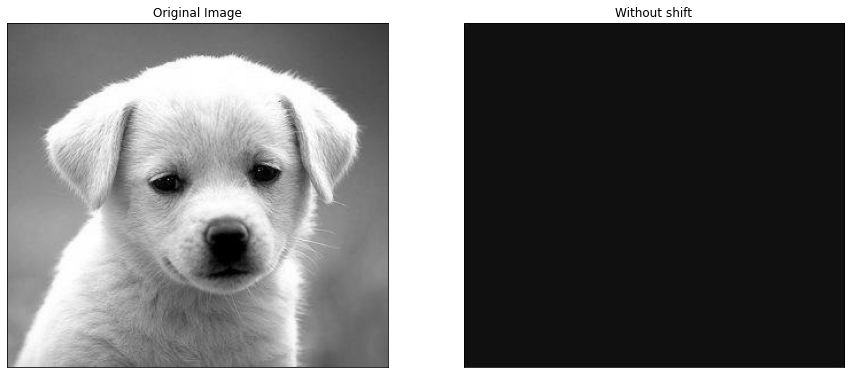

<Figure size 432x288 with 0 Axes>

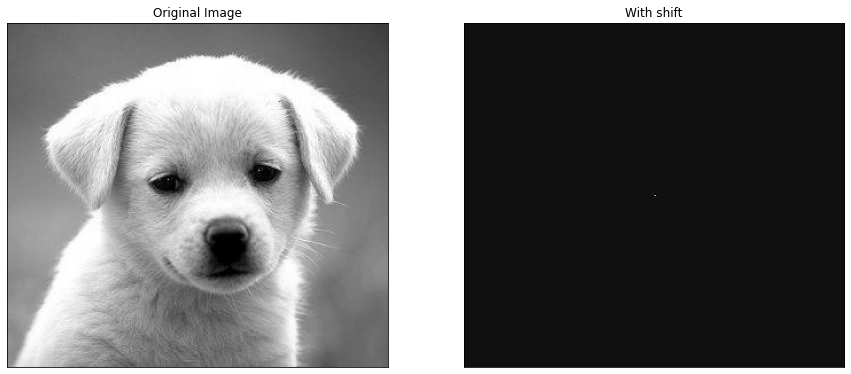

In [ ]:
f = np.fft.fft2(img)
dst = np.real(f)
show_images(dst, img, "Without shift")

f = np.fft.fft2(img)
f_shift = np.fft.fftshift(f)
dst = np.real(f_shift)

show_images(dst, img, "With shift")

## Im{F(u, v)}

<ipython-input-52-b6becacde8d3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<Figure size 432x288 with 0 Axes>

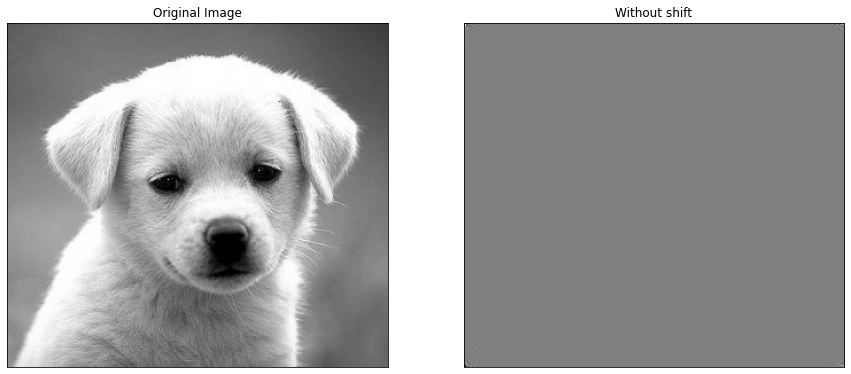

<Figure size 432x288 with 0 Axes>

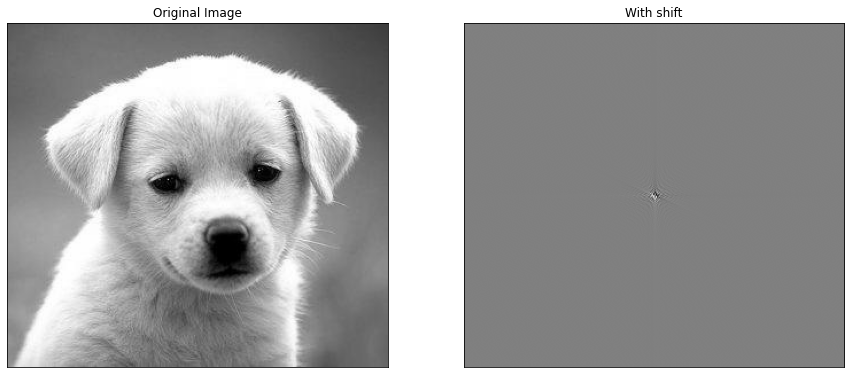

In [ ]:
f = np.fft.fft2(img)
dst = np.imag(f)
show_images(dst, img, "Without shift")

f = np.fft.fft2(img)
f_shift = np.fft.fftshift(f)
dst = np.imag(f_shift)

show_images(dst, img, "With shift")

## |F(u, v)|

<ipython-input-52-b6becacde8d3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<Figure size 432x288 with 0 Axes>

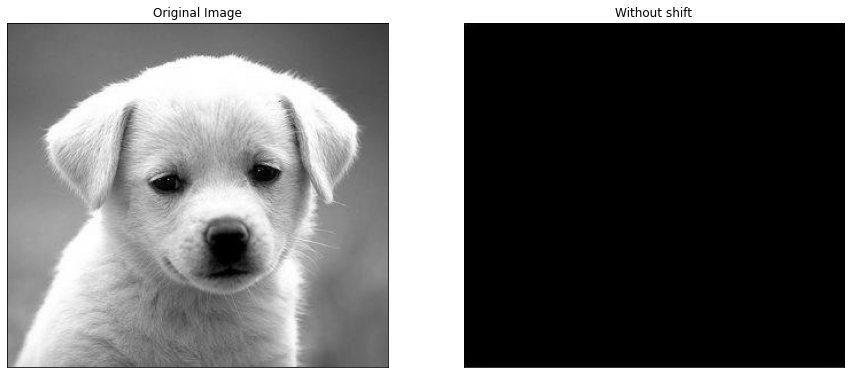

<Figure size 432x288 with 0 Axes>

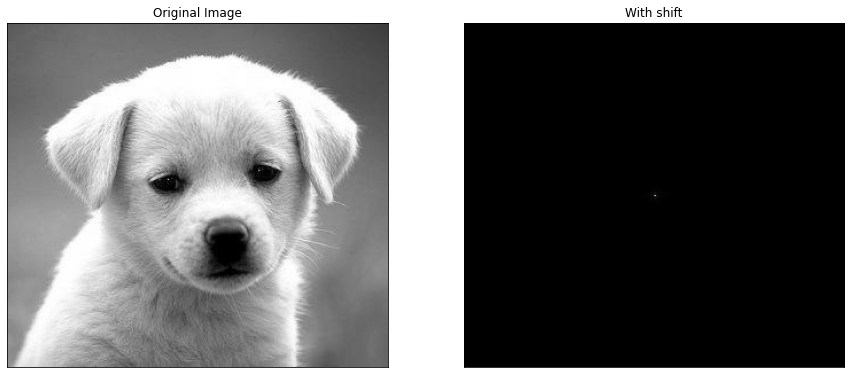

In [ ]:
f = np.fft.fft2(img)
dst = np.abs(f)
show_images(dst, img, "Without shift")

f = np.fft.fft2(img)
f_shift = np.fft.fftshift(f)
dst = np.abs(f_shift)

show_images(dst, img, "With shift")

# 3

<ipython-input-52-b6becacde8d3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<Figure size 432x288 with 0 Axes>

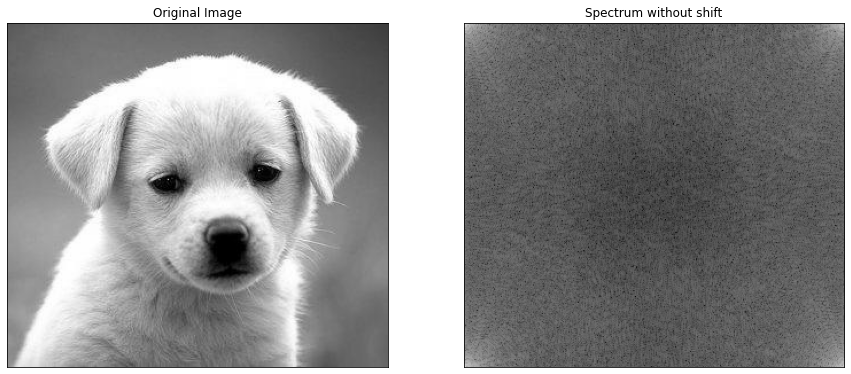

<Figure size 432x288 with 0 Axes>

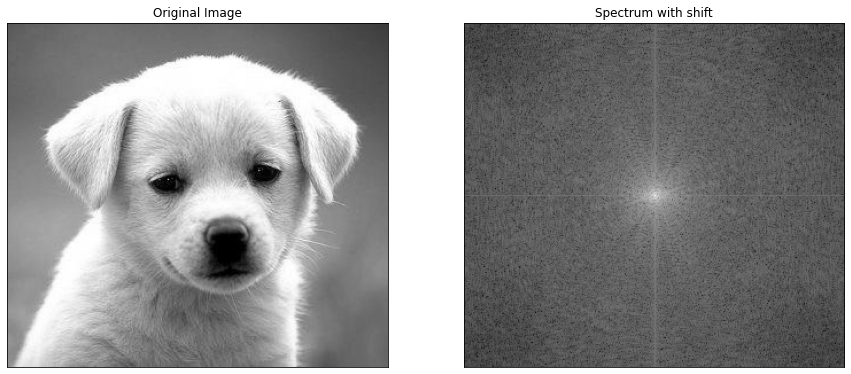

In [ ]:
f = np.fft.fft2(img)
dst = 20 * np.log(1 + np.abs(f))
show_images(dst, img, "Spectrum without shift")

f = np.fft.fft2(img)
f_shift = np.fft.fftshift(f)
dst = 20 * np.log(1 + np.abs(f_shift))
show_images(dst, img, "Spectrum with shift")

# 4

<ipython-input-87-4f4024007e21>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<Figure size 432x288 with 0 Axes>

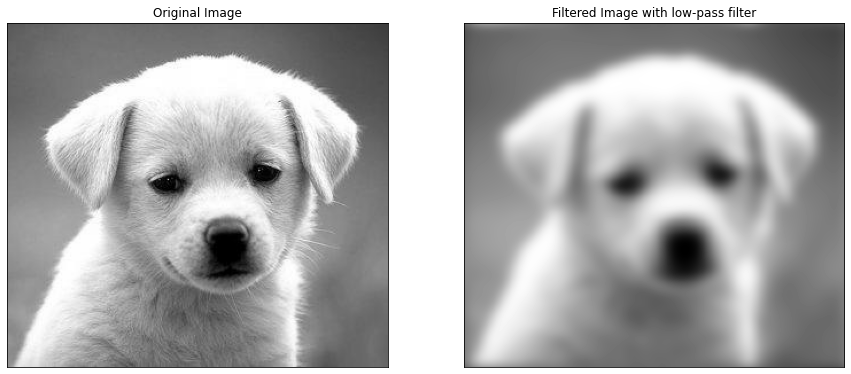

In [ ]:
f = np.fft.fft2(img)
radius = 10
H = create2DGaussian(img.shape[1],
                    img.shape[0],
                    int(img.shape[1] / 2),
                    int(img.shape[0] / 2),
                    radius,
                    radius,
                    theta = 0)

filtered_image = f * np.fft.fftshift(H)

dst = np.abs(np.fft.ifft2(filtered_image))


show_images(dst, img, "Filtered Image with low-pass filter")

# 5

<ipython-input-87-4f4024007e21>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


<Figure size 432x288 with 0 Axes>

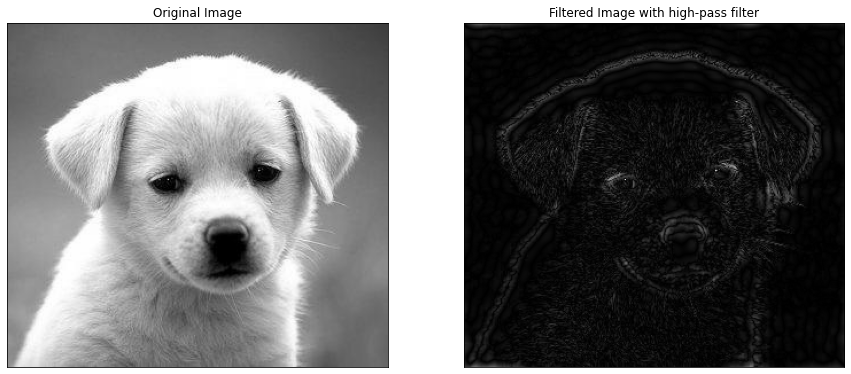

In [ ]:
f = np.fft.fft2(img)
radius = 15
H = create2DGaussian(img.shape[1],
                    img.shape[0],
                    int(img.shape[1] / 2),
                    int(img.shape[0] / 2),
                    radius,
                    radius,
                    theta = 0)

H[H >  .5] = 1.0
H[H <= .5] = 0.0
H = 1.0 - H
if radius == 0:
  mask = np.ones(H.shape, H.dtype)

filtered_image = f * np.fft.fftshift(H)

dst = np.abs(np.fft.ifft2(filtered_image))

show_images(dst, img, "Filtered Image with high-pass filter")